# Clustering Artists with the K-Mean algorithme 

In [1]:
import warnings
warnings.filterwarnings("ignore")

from Modules import Clustering as cluster
from Modules import ArtistConverter as artists

# Load data

In [2]:
df = artists.load_from_csv("artists_1992_2021")
df

,Name,Main Artist,Featuring Artist,Writer
0,'N Sync,8,1,0
1,"10,000 Maniacs",1,0,0
2,112,6,2,0
3,2 Chainz,2,2,0
4,2 Pistols,1,0,0
...,...,...,...,...
3308,iLoveMemphis,1,0,0
3309,soFLY & Nius,0,0,1
3310,soulDecision,1,0,0
3311,will.i.am,2,5,18


In [3]:
df.describe()

,Main Artist,Featuring Artist,Writer
count,3313.000000,3313.000000,3313.000000
mean,0.906429,0.254754,1.622397
std,2.405898,1.095802,3.088989
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,0.000000,2.000000
max,35.000000,27.000000,63.000000


# First we standardized the dataset

In [3]:
df_artists_standardized = cluster.standardized(df)
df_artists_standardized

,main_artist_standardized,featuring_artist_standardized,songwriter_standardized
0,2.948854,0.680195,-0.525299
1,0.038898,-0.232517,-0.525299
2,2.117438,1.592906,-0.525299
3,0.454606,1.592906,-0.525299
4,0.038898,-0.232517,-0.525299
...,...,...,...
3308,0.038898,-0.232517,-0.525299
3309,-0.376810,-0.232517,-0.201519
3310,0.038898,-0.232517,-0.525299
3311,0.454606,4.331041,5.302730


# We will use this elbow plot to determind how many clusters we should use

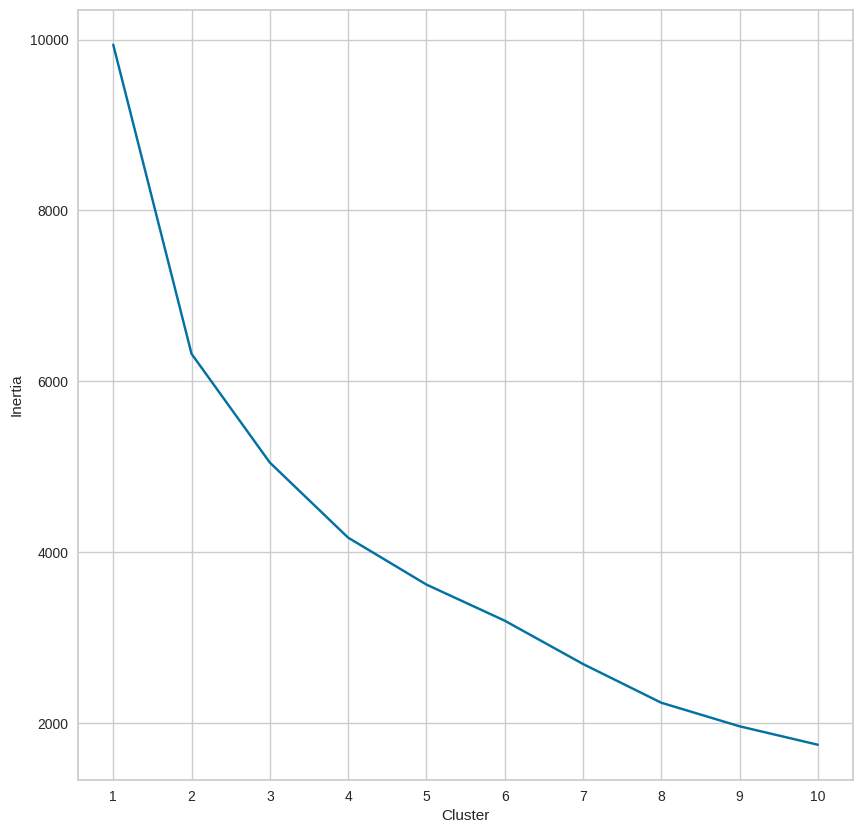

In [5]:
cluster.print_elbow_plot(df_artists_standardized)

- It looks like 4 or 5 clusters will be the optimal n of clusters

# Let's try and make a silhouette plot as well. Which shows a preview of the cluster size from 3 to 8. The red dotted line, shows the score of each plot.

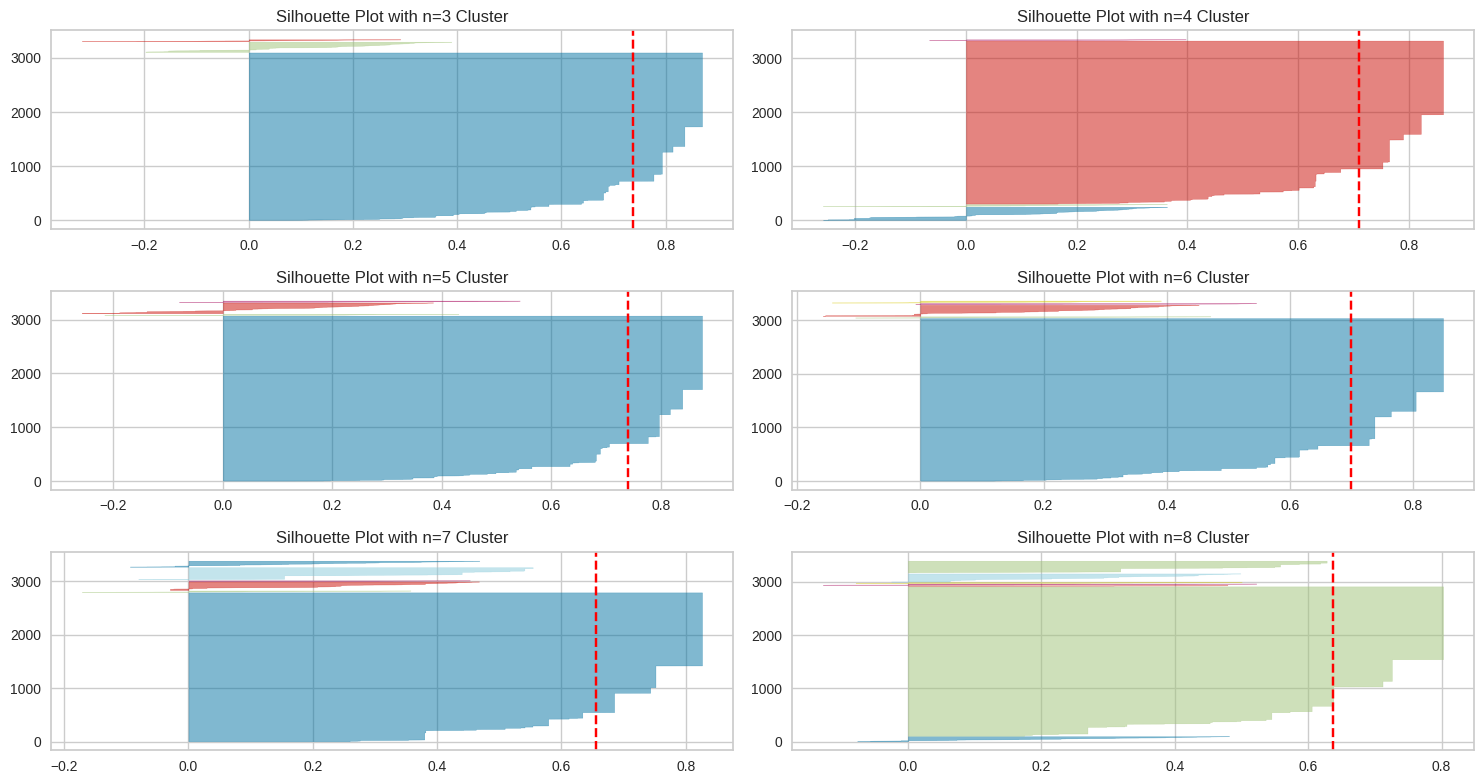

In [6]:
cluster.print_silhouette_plot(df_artists_standardized)

- These 'knives' represent a cluster each. We can see that in all cases there will be a huge chunk of artists. The majority of the artists only have 1 or songs. That's these group.
- We are interested in finding the stars and the superstars, which will be in the much smaller chunks.
- I found 6 clusters to be the best match with some experimentation. 

# Let's make a scatterplot with 6 clusters

![PCA](Pictures/pca.PNG)
- I am using pca which is an unsupervised machine learning algorithm that attempts to reduce the dimensionality (number of features) within a dataset while still retaining as much information as possible.
- I only have 3 features. But PCA makes it possible to plot it into a normal 2 dimensional scatterplot 

<AxesSubplot: xlabel='pca_x', ylabel='pca_y'>

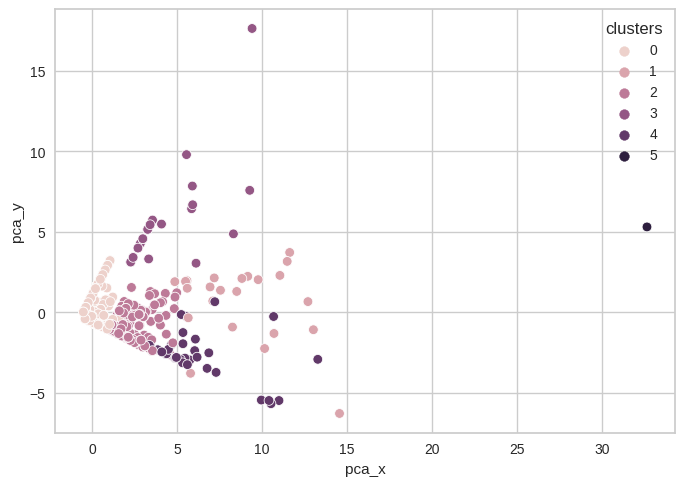

In [4]:
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.decomposition import PCA # dimensionality reduction
import pandas as pd
import seaborn as sns

clusters = 6

# Not sure what the random_state is. "..the parameter allows us to reproduce our results..."
kmeans = KMeans(n_clusters=clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_artists_standardized)
df_artists_standardized["clusters"] = cluster_labels

# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
artists_standardized_pca = pca.fit_transform(df_artists_standardized)
df_artists_standardized_pca = pd.DataFrame(data=artists_standardized_pca, columns=["pca_x", "pca_y"])
df_artists_standardized_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pca_x", y="pca_y", hue="clusters", data=df_artists_standardized_pca)

# Now we have our clusters, so lets merge it with the originale artist dataframe:

In [5]:
cluster_df = df_artists_standardized[["clusters"]]
cluster_df

,clusters
0,2
1,0
2,2
3,0
4,0
...,...
3308,0
3309,0
3310,0
3311,3


In [6]:
df_clustered_data = pd.merge(df , cluster_df, left_index=True, right_index=True)
df_clustered_data

,Name,Main Artist,Featuring Artist,Writer,clusters
0,'N Sync,8,1,0,2
1,"10,000 Maniacs",1,0,0,0
2,112,6,2,0,2
3,2 Chainz,2,2,0,0
4,2 Pistols,1,0,0,0
...,...,...,...,...,...
3308,iLoveMemphis,1,0,0,0
3309,soFLY & Nius,0,0,1,0
3310,soulDecision,1,0,0,0
3311,will.i.am,2,5,18,3


# Find interesting clusters:

In [11]:
# unimportant big chunk
c0 = df_clustered_data[df_clustered_data['clusters'] == 0]
c0

,Name,Main Artist,Featuring Artist,Writer,clusters
1,"10,000 Maniacs",1,0,0,0
3,2 Chainz,2,2,0,0
4,2 Pistols,1,0,0,0
5,20 Fingers,1,0,0,0
7,24kGoldn,2,0,0,0
...,...,...,...,...,...
3307,busbee,0,0,2,0
3308,iLoveMemphis,1,0,0,0
3309,soFLY & Nius,0,0,1,0
3310,soulDecision,1,0,0,0


In [7]:
# Big stars
c1 = df_clustered_data[df_clustered_data['clusters'] == 1]
c1

,Name,Main Artist,Featuring Artist,Writer,clusters
123,Alicia Keys,12,5,16,1
231,Ariana Grande,20,4,11,1
332,Beyoncé,20,3,21,1
467,Bruno Mars,11,7,17,1
606,Chris Brown,23,10,17,1
975,Ed Sheeran,13,0,14,1
1019,Eminem,17,4,20,1
1417,Janet Jackson,11,2,15,1
1697,Justin Bieber,15,12,21,1
1732,Kanye West,13,9,28,1


In [13]:
# Above average
c2 = df_clustered_data[df_clustered_data['clusters'] == 2]
c2.tail()

,Name,Main Artist,Featuring Artist,Writer,clusters
3269,Xscape,4,2,0,2
3276,Ying Yang Twins,2,3,0,2
3283,Young Jeezy,4,1,1,2
3291,Zac Brown,4,0,4,2
3303,Zedd,4,1,0,2


In [8]:
# Big songwriters (Not singers, mostly..)
c3 = df_clustered_data[df_clustered_data['clusters'] == 3]
c3

,Name,Main Artist,Featuring Artist,Writer,clusters
60,Adam Levine,0,3,27,3
283,Babyface,4,1,28,3
564,Chad Kroeger,1,1,15,3
633,Christopher Bridges,0,0,17,3
744,Dallas Austin,0,0,14,3
887,Diane Warren,0,0,21,3
917,Dominique Jones,0,0,13,3
954,Dwayne Carter,0,0,22,3
1397,James Harris III,0,0,20,3
1491,Jermaine Dupri,0,2,31,3


In [14]:
# Similar to cluster 1. All are top performs as well. Many as Featuring artists
c4 = df_clustered_data[df_clustered_data['clusters'] == 4]
c4

,Name,Main Artist,Featuring Artist,Writer,clusters
6,21 Savage,2,4,0,4
18,50 Cent,9,5,1,4
83,Akon,8,11,15,4
244,Ashanti,5,5,5,4
511,Camila Cabello,4,5,8,4
517,Cardi B,10,4,1,4
538,Carrie Underwood,6,4,0,4
582,Charlie Puth,5,4,8,4
627,Christina Aguilera,9,5,3,4
739,DaBaby,3,7,0,4


In [10]:
# Drake in a league of his own
c5 = df_clustered_data[df_clustered_data['clusters'] == 5]
c5

,Name,Main Artist,Featuring Artist,Writer,clusters
941,Drake,35,27,61,5


# Bar plot with the biggest stars

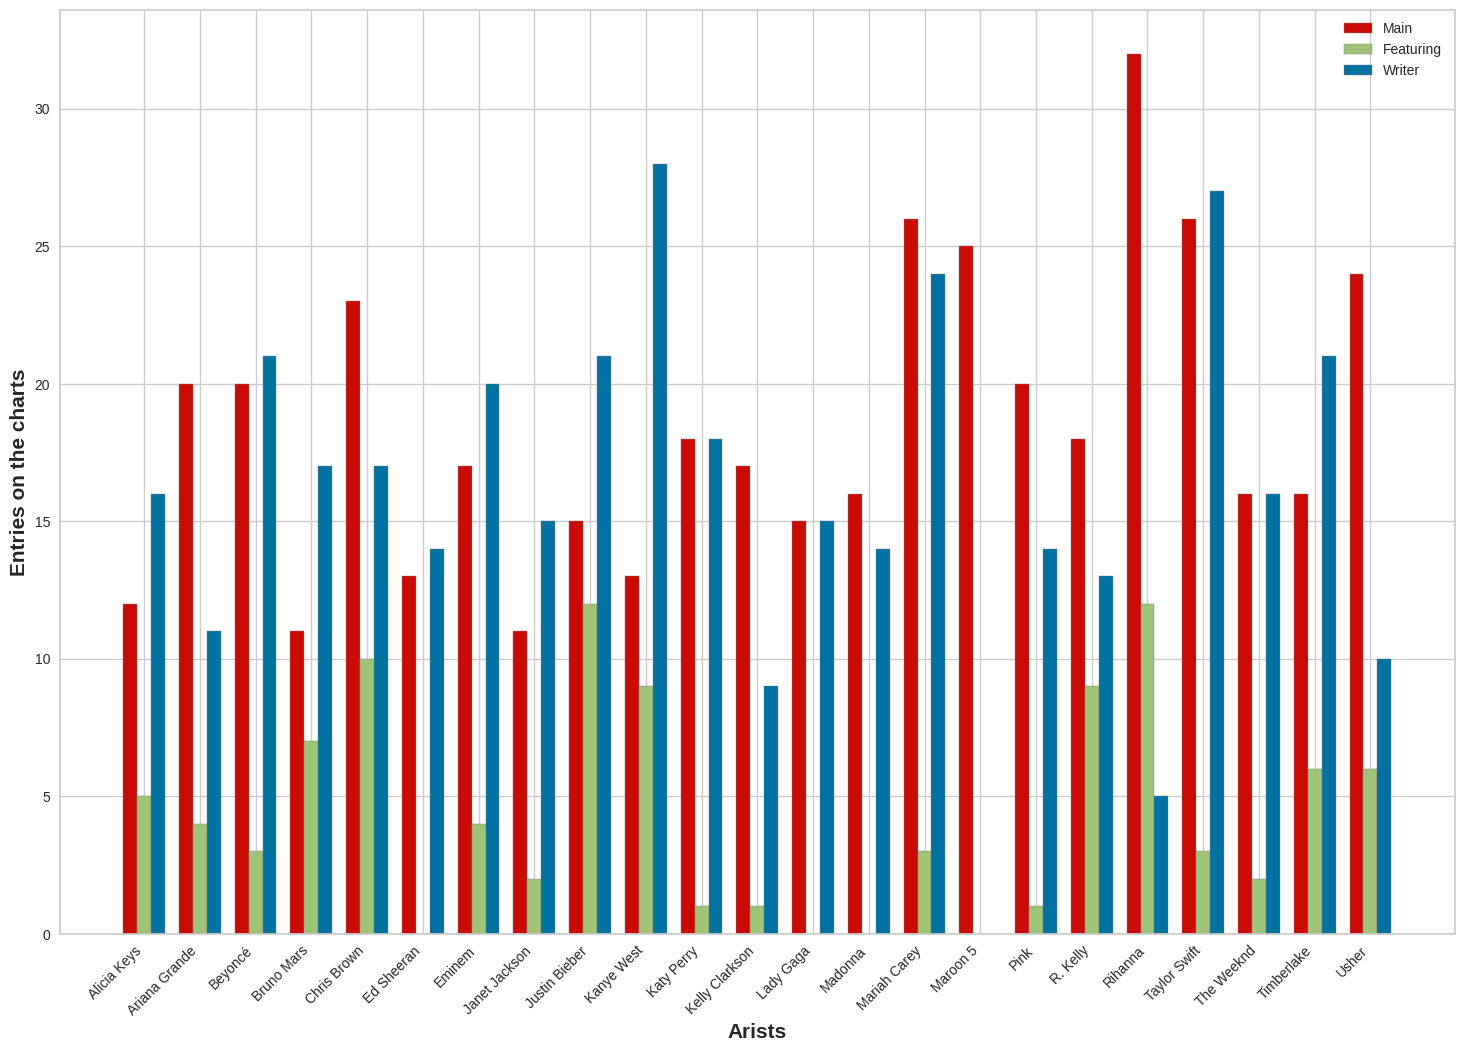

In [13]:
cluster.make_bar_chart_of_cluster(c1)